<a href="https://colab.research.google.com/github/NguyenThienPhat/NguyenThienPhat-24_02_2023/blob/main/nhan_dien_tien_giay__vn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU

from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

In [ ]:
%cd /content/drive/MyDrive/bai2

/content/drive/MyDrive/bai2


In [ ]:
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory('/content/drive/MyDrive/bai2', target_size=(150,150),batch_size=32, class_mode='categorical')
Train.class_indices

Found 120 images belonging to 6 classes.


{'100K': 0, '10K': 1, '20K': 2, '2K': 3, '500K': 4, '50K': 5}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 18, 18, 128)     

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit(Train, epochs=50, batch_size=256, verbose=1)

Epoch 1/50
4/4 [==============================] - 26s 3s/step - loss: 27.5522 - accuracy: 0.1333
Epoch 2/50
4/4 [==============================] - 1s 207ms/step - loss: 6.0168 - accuracy: 0.1833
Epoch 3/50
4/4 [==============================] - 1s 215ms/step - loss: 1.8123 - accuracy: 0.3000
Epoch 4/50
4/4 [==============================] - 1s 209ms/step - loss: 1.6175 - accuracy: 0.3083
Epoch 5/50
4/4 [==============================] - 1s 205ms/step - loss: 1.4616 - accuracy: 0.3833
Epoch 6/50
4/4 [==============================] - 1s 201ms/step - loss: 1.2869 - accuracy: 0.5167
Epoch 7/50
4/4 [==============================] - 1s 206ms/step - loss: 1.2515 - accuracy: 0.5750
Epoch 8/50
4/4 [==============================] - 1s 203ms/step - loss: 1.0509 - accuracy: 0.6417
Epoch 9/50
4/4 [==============================] - 1s 219ms/step - loss: 0.9621 - accuracy: 0.6917
Epoch 10/50
4/4 [==============================] - 1s 302ms/step - loss: 0.8328 - accuracy: 0.6500
Epoch 11/50
4/4 [===

In [ ]:
Score=model.evaluate(Train,verbose=0)
print('Hàm Mất Mát Trên Tập Kiểm Tra : ', Score[0])
print('Độ Chính Xác Trên Tập Kiểm Tra : ', Score[1])

Hàm Mất Mát Trên Tập Kiểm Tra :  0.010610184632241726
Độ Chính Xác Trên Tập Kiểm Tra :  1.0


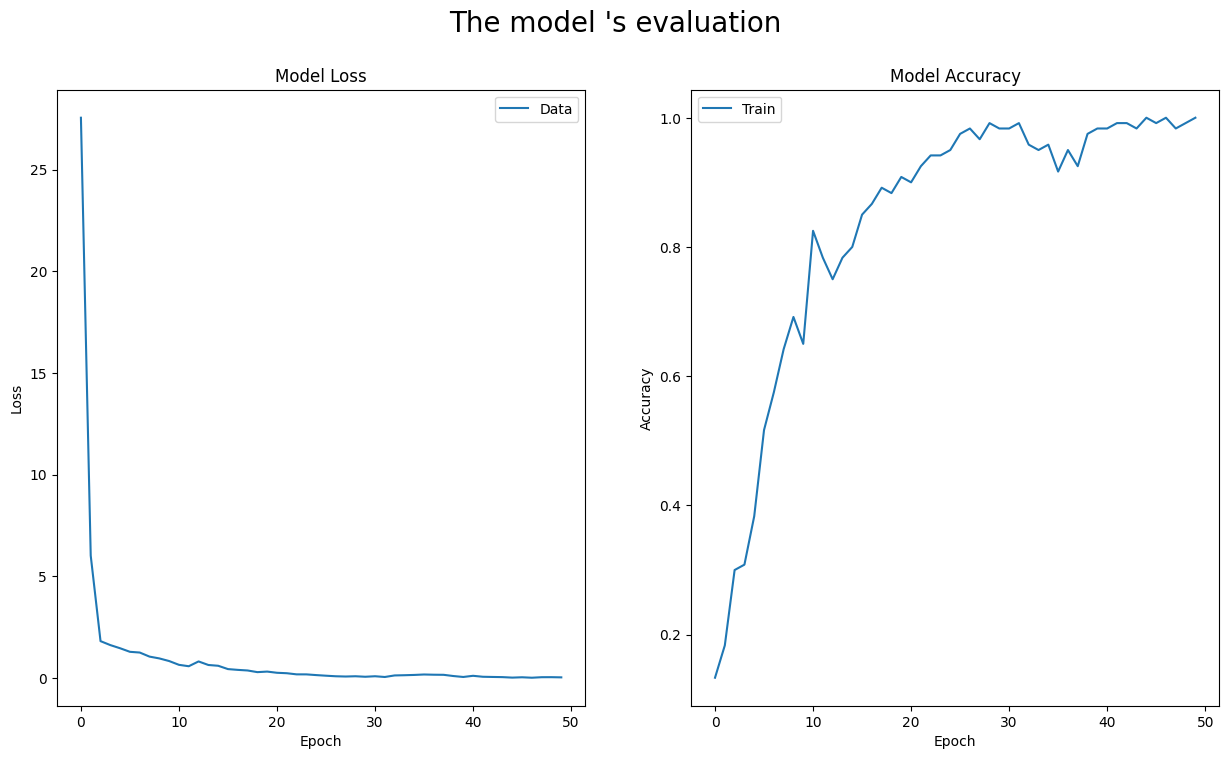

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(train.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(train.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Saved_Train/bai2.h5')

In [ ]:
model_1 = load_model('/content/drive/MyDrive/Saved_Train/bai2.h5')

1/1 [==============================] - 0s 298ms/step
Đây là  : 10K


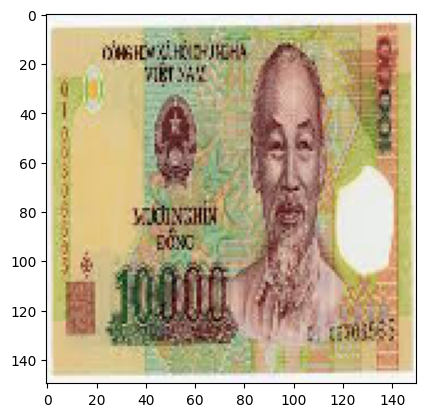

1/1 [==============================] - 0s 18ms/step
Đây là  : 20K


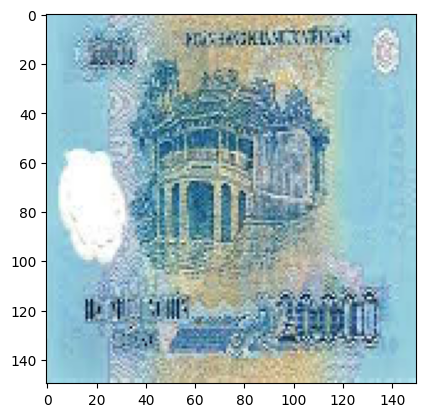

1/1 [==============================] - 0s 23ms/step
Đây là  : 50K


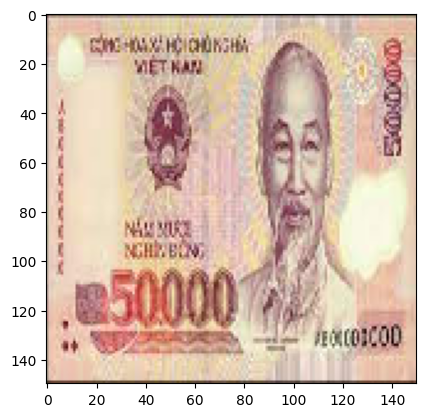

1/1 [==============================] - 0s 20ms/step
Đây là  : 100K


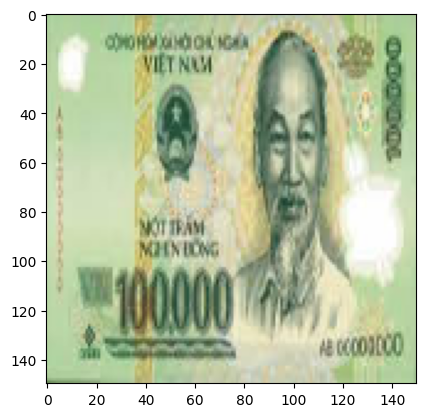

1/1 [==============================] - 0s 19ms/step
Đây là  : 500K


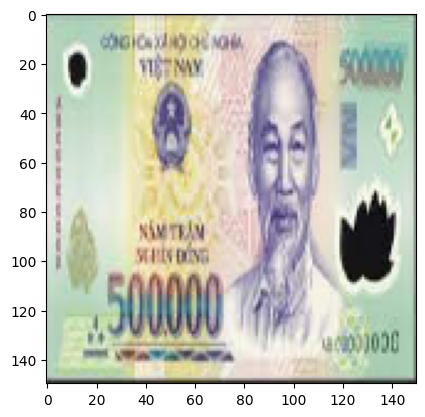

1/1 [==============================] - 0s 21ms/step
Đây là  : 2K


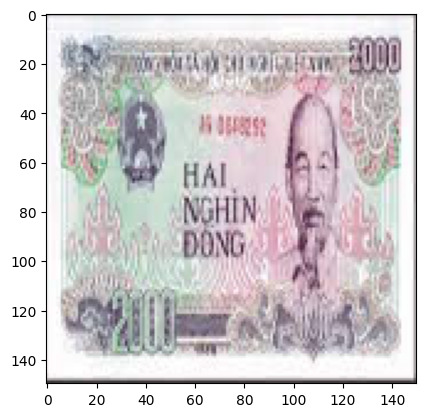

In [ ]:
folder='/content/drive/MyDrive/test2/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['100K', '10K', '20K', '2K', '500K', '50K']
  print('Đây là  : {}'.format(class_name[result]))
  plt.show()